# In-Class Exercise: Exploring Numerical Data (IMS Chapter 5) — Solutions

In this exercise we explore techniques for visualizing and summarizing **numerical** data, following the material in *Introduction to Modern Statistics* Chapter 5.

We will use two datasets from the OpenIntro project:
- `loan50` — a 50-loan sample from Lending Club with variables like `interest_rate`, `loan_amount`, `total_income`, and `grade`
- `county` — 3,142 US counties with demographic variables like `unemployment_rate`, `median_hh_income`, `pop_change`, and `pop2010`

**Key concepts covered:**
- Scatterplots for paired data
- Dot plots, histograms, and density plots
- Mean, variance, and standard deviation
- Box plots, median, quartiles, and IQR
- Robust statistics
- Log transformations for skewed data

---
## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

sns.set_theme(style='whitegrid')
%matplotlib inline

In [2]:
loan50 = pd.read_csv('loan50.csv')
county = pd.read_csv('county.csv')

print('loan50:', loan50.shape)
print('county:', county.shape)
loan50[['interest_rate', 'loan_amount', 'total_income', 'grade', 'homeownership']].head()

loan50: (50, 18)
county: (3142, 15)


,interest_rate,loan_amount,total_income,grade,homeownership
0,10.90,22000,59000,B,rent
1,9.92,6000,60000,B,rent
2,26.30,25000,75000,E,mortgage
3,9.92,6000,75000,B,rent
4,9.43,25000,254000,B,mortgage


---
## Part 1: Scatterplots

### 1a. Basic Scatterplot

A **scatterplot** shows the relationship between two numerical variables. Each point represents one observation.

Plot `loan_amount` (y-axis) vs. `total_income` (x-axis) for the `loan50` dataset. 

Apply the techniques of the Cairo "Reading Scatterplots" discussed in class: 

- TK 
- TK 


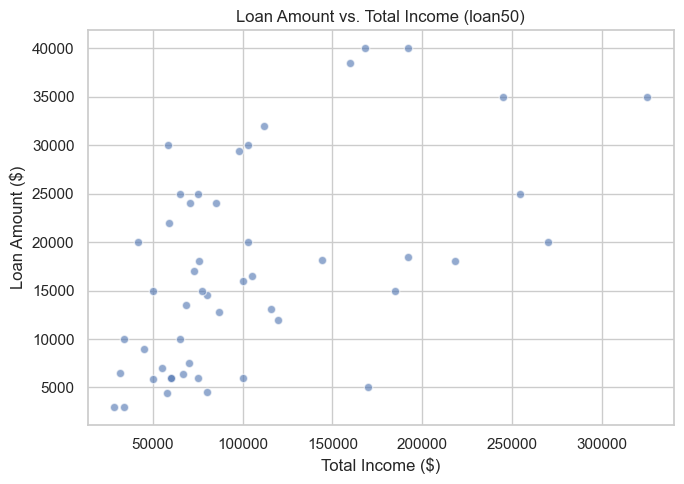

In [3]:
fig, ax = plt.subplots(figsize=(7, 5))

# Scatterplot: loan_amount vs total_income
ax.scatter(loan50['total_income'], loan50['loan_amount'], alpha=0.6, edgecolors='white')

ax.set_xlabel('Total Income ($)')
ax.set_ylabel('Loan Amount ($)')
ax.set_title('Loan Amount vs. Total Income (loan50)')
plt.tight_layout()
plt.show()

### 1b. Scatterplot with a Smooth Trend Line

Some relationships in data are **nonlinear**. A locally-weighted regression line (LOWESS) can help reveal the overall shape of a relationship without assuming it's linear.

Create a scatterplot of `median_hh_income` (y-axis) vs. `poverty` (x-axis) for the `county` dataset. Then add a LOWESS trend line using `statsmodels`.

In [ ]:
from statsmodels.nonparametric.smoothers_lowess import lowess

county_clean = county.dropna(subset=['poverty', 'median_hh_income'])

fig, ax = plt.subplots(figsize=(7, 5))

# Scatter plot
ax.scatter(county_clean['poverty'], county_clean['median_hh_income'],
           alpha=0.3, s=20, color='steelblue')

# LOWESS smooth
smoothed = lowess(county_clean['median_hh_income'], county_clean['poverty'], frac=0.3)
ax.plot(smoothed[:, 0], smoothed[:, 1], color='red', linestyle='--', linewidth=2, label='LOWESS')

ax.set_xlabel('Poverty Rate (%)')
ax.set_ylabel('Median Household Income ($)')
ax.set_title('Median Household Income vs. Poverty Rate (county)')
ax.legend()
plt.tight_layout()
plt.show()

---
## Part 2: Dot Plots and the Mean

### 2a. Dot Plot

A **dot plot** is a one-variable scatterplot — each observation appears as a dot placed at its value. When values repeat (or are similar), dots stack up.

Below is a dot plot of `interest_rate` from `loan50`, with the **mean** marked as a red triangle.

In [ ]:
# Dot plot of interest_rate
# Round to nearest integer to create stacked dots
rate_rounded = loan50['interest_rate'].round()
counter = Counter(rate_rounded)

x_vals, y_vals = [], []
for val in sorted(counter.keys()):
    for i in range(counter[val]):
        x_vals.append(val)
        y_vals.append(i)

mean_rate = loan50['interest_rate'].mean()

fig, ax = plt.subplots(figsize=(9, 3))
ax.scatter(x_vals, y_vals, s=200, color='steelblue', edgecolors='white', zorder=3)
ax.plot(mean_rate, -0.8, 'r^', markersize=14, label=f'Mean = {mean_rate:.2f}%')
ax.set_xlabel('Interest Rate (%)')
ax.set_yticks([])
ax.set_title('Interest Rates from loan50 (each dot = one loan)')
ax.legend()
plt.tight_layout()
plt.show()

### 2b. Computing the Mean

The **sample mean** $\bar{x}$ is the sum of all values divided by the number of observations:
$$\bar{x} = \frac{x_1 + x_2 + \cdots + x_n}{n}$$

Compute the mean `interest_rate` from `loan50` two ways:
1. Manually using `.sum()` and `len()`
2. Using pandas `.mean()`

In [ ]:
# Compute mean manually using .sum() and len()
mean_manual = loan50['interest_rate'].sum() / len(loan50['interest_rate'])

# Compute mean using .mean()
mean_pandas = loan50['interest_rate'].mean()

print(f'Manual mean:  {mean_manual:.4f}%')
print(f'Pandas mean:  {mean_pandas:.4f}%')

---
## Part 3: Histograms, Density Plots, and Shape

### 3a. Histogram

A **histogram** groups observations into bins and shows the count (or density) in each bin, giving a view of the overall shape of the distribution.

In [ ]:
bins = list(range(5, 30, 3))

fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(loan50['interest_rate'], bins=bins, edgecolor='white')
ax.set_xlabel('Interest Rate (%)')
ax.set_ylabel('Count')
ax.set_title('Distribution of Interest Rates (loan50)')
plt.tight_layout()
plt.show()

### 3b. Describing Shape

**Question:** Looking at the histogram above, how would you describe the distribution of `interest_rate`?

**Answer:** The distribution is **right-skewed** (or skewed to the high end): most loans have rates between 5% and 15%, but there is a long tail of loans with higher rates up to ~26%. It is **unimodal** — there is one clear peak around 7–10%. The center is roughly around 11–12% (the mean is 11.57%).

### 3c. Density Plot

A **density plot** is a smoothed version of a histogram. Create one for `interest_rate` using `sns.kdeplot()`.

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))

sns.kdeplot(loan50['interest_rate'], fill=True, ax=ax)

ax.set_xlabel('Interest Rate (%)')
ax.set_ylabel('Density')
ax.set_title('Density Plot of Interest Rates (loan50)')
plt.tight_layout()
plt.show()

### 3d. Modality: Unimodal, Bimodal, Multimodal

In [ ]:
rng = np.random.default_rng(42)
uni   = rng.chisquare(6, 300)
bi    = np.concatenate([rng.chisquare(5, 150), rng.normal(20, 2, 150)])
multi = np.concatenate([rng.chisquare(3, 150), rng.normal(15, 1, 100), rng.normal(25, 1.5, 100)])

fig, axes = plt.subplots(1, 3, figsize=(13, 3), sharey=False)
for ax, data, title in zip(axes, [uni, bi, multi], ['Unimodal', 'Bimodal', 'Multimodal']):
    ax.hist(data, bins=20, edgecolor='white')
    ax.set_title(title)
    ax.set_xlabel('Value')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

---
## Part 4: Variance and Standard Deviation

### 4a. Computing Variance Step by Step

$$s^2 = \frac{\sum_{i=1}^n (x_i - \bar{x})^2}{n - 1} \qquad s = \sqrt{s^2}$$

In [ ]:
rates = loan50['interest_rate']
n = len(rates)
xbar = rates.mean()

# Step 1: compute each deviation from the mean
deviations = rates - xbar

# Step 2: square each deviation
squared_devs = deviations ** 2

# Step 3: sum and divide by n-1
variance = squared_devs.sum() / (n - 1)

# Step 4: take the square root
std_dev = np.sqrt(variance)

print(f'Mean:               {xbar:.4f}%')
print(f'Variance (manual):  {variance:.4f}')
print(f'Std dev (manual):   {std_dev:.4f}%')

### 4b. Using Pandas

In [ ]:
var_pandas = rates.var()   # ddof=1 by default
std_pandas = rates.std()   # ddof=1 by default

print(f'Variance (pandas):  {var_pandas:.4f}')
print(f'Std dev (pandas):   {std_pandas:.4f}%')

---
## Part 5: Box Plots, Quartiles, and the Median

### 5a. Box Plot

In [ ]:
fig, ax = plt.subplots(figsize=(8, 2.5))
ax.boxplot(loan50['interest_rate'].dropna(), vert=False,
           patch_artist=True, boxprops=dict(facecolor='steelblue', alpha=0.5),
           flierprops=dict(marker='o', markerfacecolor='steelblue', markersize=6))
ax.set_xlabel('Interest Rate (%)')
ax.set_yticks([])
ax.set_title('Box Plot of Interest Rates (loan50)')
plt.tight_layout()
plt.show()

### 5b. Five-Number Summary and IQR

In [ ]:
# Full summary
print(loan50['interest_rate'].describe())
print()

# IQR
Q1 = loan50['interest_rate'].quantile(0.25)
Q3 = loan50['interest_rate'].quantile(0.75)
IQR = Q3 - Q1

print(f'Q1  = {Q1:.2f}%')
print(f'Q3  = {Q3:.2f}%')
print(f'IQR = {IQR:.2f}%')

### 5c. Side-by-Side Box Plots by Grade

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

sns.boxplot(data=loan50, x='grade', y='interest_rate', 
            order=sorted(loan50['grade'].dropna().unique()), ax=ax)

ax.set_title('Interest Rate by Loan Grade (loan50)')
ax.set_xlabel('Loan Grade')
ax.set_ylabel('Interest Rate (%)')
plt.tight_layout()
plt.show()

---
## Part 6: Robust Statistics

### 6a. Effect of Extreme Values

In [ ]:
original = loan50['interest_rate'].copy()
moved_to_15 = original.replace(26.3, 15.0)
moved_to_35 = original.replace(26.3, 35.0)

results = pd.DataFrame({
    'Scenario':  ['Original (26.3%)', 'Move to 15%', 'Move to 35%'],
    'Median':    [s.median() for s in [original, moved_to_15, moved_to_35]],
    'IQR':       [s.quantile(0.75) - s.quantile(0.25) for s in [original, moved_to_15, moved_to_35]],
    'Mean':      [s.mean() for s in [original, moved_to_15, moved_to_35]],
    'Std Dev':   [s.std() for s in [original, moved_to_15, moved_to_35]],
}).set_index('Scenario').round(2)

results

**Answer:** The **median and IQR change very little** (or not at all) across the three scenarios, while the **mean and standard deviation change noticeably**. This is because the median depends only on the middle values, and the IQR depends only on the 25th and 75th percentiles — neither is affected by how extreme the most outlying value is. The mean and standard deviation, on the other hand, incorporate every value, so changing one extreme observation pulls them in that direction.

Prefer the **median and IQR** when your data contain outliers or are strongly skewed, since they give a more representative picture of the typical observation. The **mean and SD** work well for roughly symmetric data without extreme outliers.

---
## Part 7: Transforming Data

### 7a. Log Transformation of a Skewed Variable

In [ ]:
county_clean = county.dropna(subset=['unemployment_rate'])

# Before transformation
fig, ax = plt.subplots(figsize=(7, 4))
ax.hist(county_clean['unemployment_rate'], bins=30, edgecolor='white')
ax.set_xlabel('Unemployment Rate (%)')
ax.set_ylabel('Count')
ax.set_title('Raw Unemployment Rate')
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(7, 4))

ax.hist(np.log10(county_clean['unemployment_rate']), bins=30, edgecolor='white')

ax.set_xlabel('log10(Unemployment Rate)')
ax.set_ylabel('Count')
ax.set_title('Log10-Transformed Unemployment Rate')
plt.tight_layout()
plt.show()

### 7b. Transformation in a Scatterplot

In [ ]:
county_sc = county.dropna(subset=['pop2010', 'pop_change'])

# Before: pop_change vs pop2010 (raw)
fig, ax = plt.subplots(figsize=(7, 5))
ax.scatter(county_sc['pop2010'], county_sc['pop_change'], alpha=0.3, s=20)
ax.set_xlabel('Population in 2010')
ax.set_ylabel('Population Change (%)')
ax.set_title('Pop Change vs. Population (raw)')
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(7, 5))

ax.scatter(np.log10(county_sc['pop2010']), county_sc['pop_change'], alpha=0.3, s=20)

ax.set_xlabel('log10(Population in 2010)')
ax.set_ylabel('Population Change (%)')
ax.set_title('Pop Change vs. log10(Population)')
plt.tight_layout()
plt.show()

**Answer:** In the raw scatterplot, nearly all counties are crammed against the left side of the x-axis because a few very large counties (like Los Angeles or Cook County) pull the x-axis scale out. Any relationship between population and population change is invisible. After the log10 transformation, the x-axis is spread out evenly and a **positive association** becomes visible: counties with larger populations (higher log10(pop)) tend to have somewhat higher population growth. The transformation reveals the structure that the raw scale was hiding.